In [10]:
## IMPORTS
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats


In [11]:
# Display the first few rows to get a feel for the data
job_tweets_raw_df = pd.read_csv("../data/Job_Tweets.csv")
job_tweets_raw_df.head(10)

,ID,Timestamp,User,Text,Hashtag,Retweets,Likes,Replies,Source,Location,Verified_Account,Followers,Following
0,1211798864656769025,2019-12-30 23:58:58+00:00,SipapuNM,Looking for an exciting job where you can ski ...,NaN,0,1,0,"<a href=""http://instagram.com"" rel=""nofollow"">...","20 miles SE of Taos, NM",False,3342,258
1,1211797371853705220,2019-12-30 23:53:02+00:00,LorettaOD1,Hail in Phoenix - no way! New opportunity at ...,['job'],0,0,0,"<a href=""http://jobvite.com"" rel=""nofollow"">Jo...",Arizona,False,63,129
2,1211795775363145728,2019-12-30 23:46:41+00:00,guajardo_celina,Rackspace is hiring! We are looking for Nation...,"['becomearacker', 'Rackspace', 'recruiting', '...",0,0,0,"<a href=""http://jobvite.com"" rel=""nofollow"">Jo...","Texas, USA",False,19,50
3,1211793355060981767,2019-12-30 23:37:04+00:00,SteveEckert_OTD,We are #hiring Administrative Assistant in Nan...,"['hiring', 'jobs', 'Nanuet']",0,0,0,"<a href=""http://www.ziprecruiter.com"" rel=""nof...","Orange County, California",False,966,1569
4,1211792689022349315,2019-12-30 23:34:25+00:00,HireLive,We are #hiring Family Service Counselor in Irv...,"['hiring', 'jobs', 'Irvine']",0,0,0,"<a href=""http://www.ziprecruiter.com"" rel=""nof...",United States,False,983,1251
5,1211792528388841473,2019-12-30 23:33:47+00:00,HireLive,We are #hiring Inside Sales Representative in ...,"['hiring', 'jobs', 'Irvine']",0,0,0,"<a href=""http://www.ziprecruiter.com"" rel=""nof...",United States,False,983,1251
6,1211791693005099008,2019-12-30 23:30:28+00:00,HireLive,We are #hiring Community Service Counselor in ...,"['hiring', 'jobs', 'Irvine']",0,0,0,"<a href=""http://www.ziprecruiter.com"" rel=""nof...",United States,False,983,1251
7,1211790931772477440,2019-12-30 23:27:26+00:00,HireLive,We are #hiring Outside Sales Representative in...,"['hiring', 'jobs', 'Irvine']",0,0,0,"<a href=""http://www.ziprecruiter.com"" rel=""nof...",United States,False,983,1251
8,1211789520473079809,2019-12-30 23:21:50+00:00,PRGWest,We are #hiring Workday HRIS Manager 19-00454 ...,"['hiring', 'jobs', 'Irvine']",0,0,0,"<a href=""http://www.ziprecruiter.com"" rel=""nof...",Southern California,False,829,1015
9,1211788232620412929,2019-12-30 23:16:43+00:00,GhLisa,We are #hiring Restaurant Manager - Hourly Man...,"['hiring', 'jobs', 'Laurel']",0,0,0,"<a href=""http://www.ziprecruiter.com"" rel=""nof...","Mississippi, USA",False,89,80


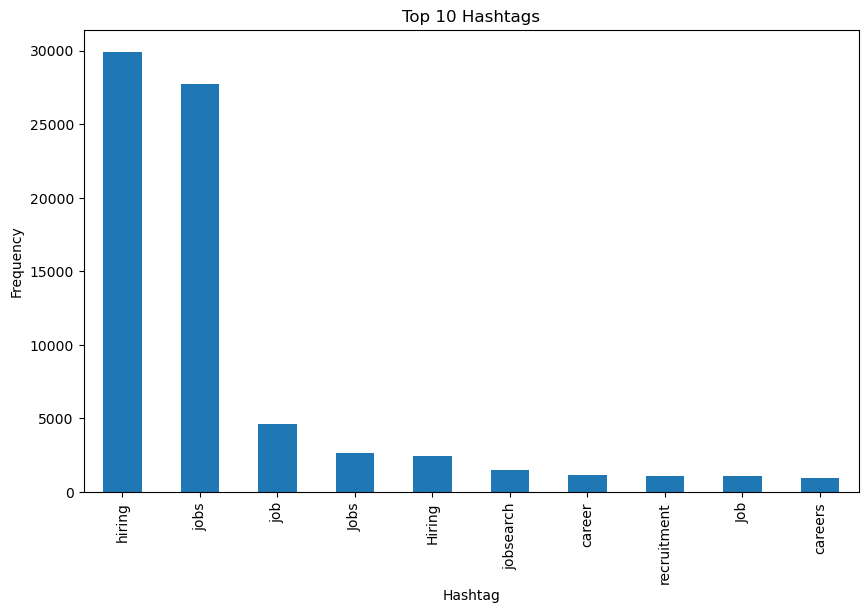

In [12]:
# Extract hashtags and analyze their frequency
import re

# Function to extract hashtags from text
def extract_hashtags(text):
    return re.findall(r"#(\w+)", text)

# Apply the function to the 'Text' column and explode the list of hashtags into separate rows
hashtags = job_tweets_raw_df['Text'].dropna().apply(extract_hashtags).explode()

# Count the occurrences of each hashtag
hashtag_counts = hashtags.value_counts()

# Plot the top 10 hashtags
hashtag_counts.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.show()


359      [hiring, irishjobs, jobfairy, jobs, job]
407      [hiring, irishjobs, jobfairy, jobs, job]
431      [hiring, irishjobs, jobfairy, jobs, job]
519      [hiring, irishjobs, jobfairy, jobs, job]
535      [hiring, irishjobs, jobfairy, jobs, job]
                           ...                   
46678                                       [Job]
47238               [jobfairy, jobs, job, hiring]
47277                                          []
48638                                  [JobFairy]
48639                                  [JobFairy]
Name: Text, Length: 197, dtype: object

12851                             [job, jobdating, hiring]
16820                                                   []
16847    [fintech, banking, digitalbanking, wearehiring...
21026                    [job, flutterdevelopper, flutter]
23392    [Nidec, LeroySomer, Job, engineer, insidesale,...
23489                                                   []
28155         [Hiring, TestandServiceLaboratoryTechnician]
28830    [hiring, Job, Recruitment, JobOffer, WeAreHiri...
32799       [hiring, AI, Software, DevRel, Advocacy, Jobs]
Name: Text, dtype: object

In [38]:
def get_word_frequencies(column):
    word_frequencies = {}
    for word_list in column:
        for word in word_list:
            if word in word_frequencies:
                word_frequencies[word] += 1
            else:
                word_frequencies[word] = 1
    return word_frequencies
ireland_hashtags = job_tweets_raw_df[job_tweets_raw_df['Location'] == 'Ireland']['Text'].apply(extract_hashtags)
get_word_frequencies(ireland_hashtags)

{'hiring': 155,
 'irishjobs': 135,
 'jobfairy': 164,
 'jobs': 145,
 'job': 153,
 'recruitment': 1,
 'ViClarity': 1,
 'customersupport': 1,
 'Dundalk': 2,
 'customercare': 2,
 'IT': 2,
 'content': 2,
 'irishjobfairy': 1,
 'marketing': 1,
 'agencywork': 1,
 'socialinnovation': 1,
 'youth': 1,
 'education': 1,
 'Job': 4,
 'Recruiting': 1,
 'Jobs': 3,
 'SightLoss': 1,
 'AmazingTeam': 1,
 'marketingjobs': 1,
 'Careers': 2,
 'GreenJobs': 2,
 'renovation': 1,
 'JobFairy': 8,
 'partnered': 1,
 'global': 1,
 'automation': 1,
 'MachineVision': 1,
 'Robotics': 1,
 'Engineer': 1,
 'Graduate': 1,
 'DefenceForces': 1,
 'Charity': 2,
 'veterans': 1,
 'PTSD': 1,
 'WeAreHiring': 12,
 'vmwarelife': 1,
 'eHealth4all': 2,
 'Hiring': 1,
 'Counselling': 1,
 'Support': 1,
 'IrishCharity': 1,
 'HeadOfSupport': 1,
 'Ireland': 1,
 'CounsellingServices': 1,
 'climatejustice': 1}

                 ID      Retweets         Likes       Replies     Followers  \
count  5.000000e+04  50000.000000  50000.000000  50000.000000  5.000000e+04   
mean   1.451833e+18      0.692100      1.347860      0.108920  5.511382e+03   
std    1.627261e+17      7.441484     17.527216      1.276483  6.770825e+04   
min    1.204098e+18      0.000000      0.000000      0.000000  0.000000e+00   
25%    1.331194e+18      0.000000      0.000000      0.000000  8.000000e+01   
50%    1.471224e+18      0.000000      0.000000      0.000000  2.980000e+02   
75%    1.605666e+18      0.000000      0.000000      0.000000  1.258000e+03   
max    1.645532e+18   1016.000000   1677.000000    175.000000  5.226473e+06   

           Following  
count   50000.000000  
mean     1961.965460  
std      5847.789338  
min         0.000000  
25%        94.000000  
50%       331.000000  
75%      1076.000000  
max    310791.000000  


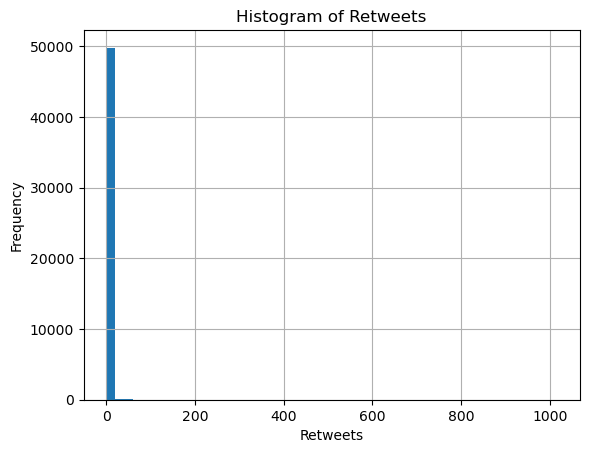

T-statistic: -1.1075870092339801, P-value: 0.2693975962195677
++Ireland Hashtags:  {'hiring': 155, 'irishjobs': 135, 'jobfairy': 164, 'jobs': 145, 'job': 153, 'recruitment': 1, 'ViClarity': 1, 'customersupport': 1, 'Dundalk': 2, 'customercare': 2, 'IT': 2, 'content': 2, 'irishjobfairy': 1, 'marketing': 1, 'agencywork': 1, 'socialinnovation': 1, 'youth': 1, 'education': 1, 'Job': 4, 'Recruiting': 1, 'Jobs': 3, 'SightLoss': 1, 'AmazingTeam': 1, 'marketingjobs': 1, 'Careers': 2, 'GreenJobs': 2, 'renovation': 1, 'JobFairy': 8, 'partnered': 1, 'global': 1, 'automation': 1, 'MachineVision': 1, 'Robotics': 1, 'Engineer': 1, 'Graduate': 1, 'DefenceForces': 1, 'Charity': 2, 'veterans': 1, 'PTSD': 1, 'WeAreHiring': 12, 'vmwarelife': 1, 'eHealth4all': 2, 'Hiring': 1, 'Counselling': 1, 'Support': 1, 'IrishCharity': 1, 'HeadOfSupport': 1, 'Ireland': 1, 'CounsellingServices': 1, 'climatejustice': 1}
++France Hashtags:  {'job': 2, 'jobdating': 1, 'hiring': 3, 'fintech': 1, 'banking': 1, 'digitalbanki

In [41]:
# Descriptive statistics
print(job_tweets_raw_df.describe())

# Visualizations
job_tweets_raw_df['Retweets'].hist(bins=50)
plt.title('Histogram of Retweets')
plt.xlabel('Retweets')
plt.ylabel('Frequency')
plt.show()

# Inferential statistics - t-test example
# Hypothesis: The number of likes for tweets from Ireland is different from the overall average
ireland_likes = job_tweets_raw_df[job_tweets_raw_df['Location'] == 'Ireland']['Likes']
overall_likes = job_tweets_raw_df['Likes']
t_stat, p_val = stats.ttest_1samp(ireland_likes, overall_likes.mean())

print(f'T-statistic: {t_stat}, P-value: {p_val}')

# Comparative research - chi-squared test example
# Hypothesis: The distribution of hashtags used is different between Ireland and another country
ireland_hashtags = job_tweets_raw_df[job_tweets_raw_df['Location'] == 'Ireland']['Text'].apply(extract_hashtags)
print("++Ireland Hashtags: ",get_word_frequencies(ireland_hashtags))
france_hashtags = job_tweets_raw_df[job_tweets_raw_df['Location'] == 'France']['Text'].apply(extract_hashtags) 
print("++France Hashtags: ",get_word_frequencies(france_hashtags))
spain_hashtags = job_tweets_raw_df[job_tweets_raw_df['Location'] == 'Spain']['Text'].apply(extract_hashtags)
print("++Spain Hashtags: ",get_word_frequencies(spain_hashtags))
germany_hashtags = job_tweets_raw_df[job_tweets_raw_df['Location'] == 'Germany']['Text'].apply(extract_hashtags) 
print("++Germany Hashtags: ",get_word_frequencies(germany_hashtags))
# chi2_stat, p_val, dof, ex = stats.chi2_contingency([ireland_hashtags, france_hashtags])

print(f'Chi-squared statistic: {chi2_stat}, P-value: {p_val}')

# Discussing the results and challenges faced
# This section would be narrative explaining the findings and any issues encountered during the analysis


In [23]:
# Example for a two-sample t-test (parametric)
# Hypothesis: There is a difference in the mean number of Likes between verified and non-verified users.
verified_likes = job_tweets_raw_df[job_tweets_raw_df['Verified_Account'] == True]['Likes']
non_verified_likes = job_tweets_raw_df[job_tweets_raw_df['Verified_Account'] == False]['Likes']

# Performing the t-test
t_stat, p_val = stats.ttest_ind(verified_likes, non_verified_likes, equal_var=False)
print(f'Two-sample t-test result | t-statistic: {t_stat}, P-value: {p_val}')

# Example for Mann-Whitney U test (non-parametric)
# Hypothesis: The distribution of Followers is different between verified and non-verified users.
u_stat, p_val = stats.mannwhitneyu(verified_likes, non_verified_likes)
print(f'Mann-Whitney U test result | U-statistic: {u_stat}, P-value: {p_val}')


Two-sample t-test result | t-statistic: 5.278294457997688, P-value: 1.51315212929305e-07
Mann-Whitney U test result | U-statistic: 53052966.0, P-value: 0.0


In [24]:
# Example of one-way ANOVA
# Hypothesis: There is a significant difference in the mean number of Likes among different user locations.
# First, we filter the data for the top N locations with the most tweets to simplify the analysis.
top_locations = job_tweets_raw_df['Location'].value_counts().head(10).index
filtered_df = job_tweets_raw_df[job_tweets_raw_df['Location'].isin(top_locations)]

# Perform one-way ANOVA
f_val, p_val = stats.f_oneway(*[filtered_df[filtered_df['Location'] == loc]['Likes'] for loc in top_locations])
print(f'One-way ANOVA result | F-statistic: {f_val}, P-value: {p_val}')


One-way ANOVA result | F-statistic: 32.81861885692344, P-value: 1.4348396804124144e-57


In [25]:
# Example of chi-squared test
# Hypothesis: There is an association between the usage of hashtags and the location of the user.
# Creating a contingency table
contingency_table = pd.crosstab(job_tweets_raw_df['Hashtag'], job_tweets_raw_df['Location'])

# Performing the chi-squared test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Chi-squared test result | Chi2 Statistic: {chi2_stat}, P-value: {p_val}')


Chi-squared test result | Chi2 Statistic: 125423374.99911703, P-value: 0.0


In [26]:
import statsmodels.api as sm

# Example of linear regression
# Hypothesis: Number of Followers and Following predict the number of Likes.
X = job_tweets_raw_df[['Followers', 'Following']]  # independent variables
y = job_tweets_raw_df['Likes']  # dependent variable

# Add a constant to the model (the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Likes   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     95.11
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           5.95e-42
Time:                        02:57:31   Log-Likelihood:            -2.1404e+05
No. Observations:               50000   AIC:                         4.281e+05
Df Residuals:                   49997   BIC:                         4.281e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3265      0.083     16.056      0.0

In [42]:
# Calculate Pearson correlation coefficient for normally distributed data
correlation_matrix = job_tweets_raw_df[['Likes', 'Retweets', 'Followers', 'Following']].corr(method='pearson')
print(correlation_matrix)

# If data is not normally distributed, use Spearman rank correlation
spearman_correlation = job_tweets_raw_df[['Likes', 'Retweets', 'Followers', 'Following']].corr(method='spearman')
print(spearman_correlation)


              Likes  Retweets  Followers  Following
Likes      1.000000  0.734589   0.060525  -0.005502
Retweets   0.734589  1.000000   0.039839   0.000219
Followers  0.060525  0.039839   1.000000   0.094255
Following -0.005502  0.000219   0.094255   1.000000
              Likes  Retweets  Followers  Following
Likes      1.000000  0.497596   0.255144   0.110573
Retweets   0.497596  1.000000   0.246461   0.130979
Followers  0.255144  0.246461   1.000000   0.772158
Following  0.110573  0.130979   0.772158   1.000000


In [46]:
job_tweets_raw_df['ID'].values

array([1211798864656769025, 1211797371853705220, 1211795775363145728, ...,
       1636305111726141440, 1636304982768066561, 1636304979593158657],
      dtype=int64)

In [54]:
job_tweets_raw_df['Timestamp'] = pd.to_datetime(job_tweets_raw_df['Timestamp'])

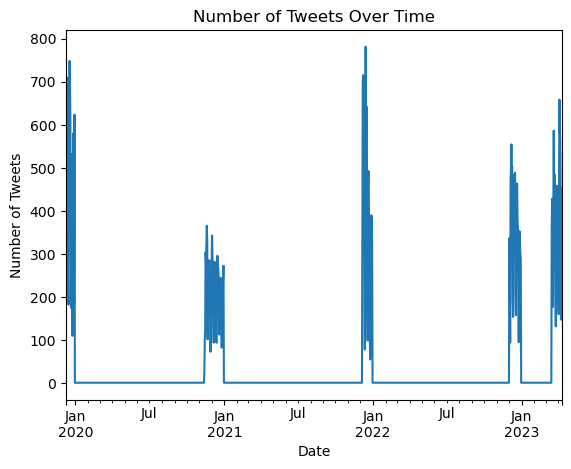

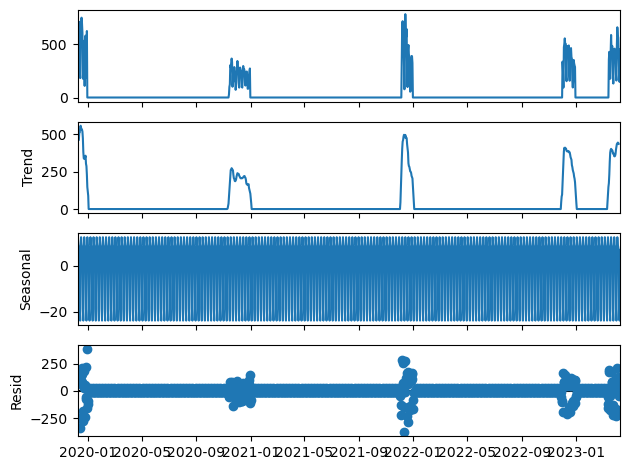

In [55]:
# Time series analysis of tweets per day
tweets_per_day = pd.Series(job_tweets_raw_df['ID'].values, index=job_tweets_raw_df['Timestamp']).resample('d').count()
tweets_per_day.plot(title='Number of Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

# Decomposing the time series to observe trends and seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(tweets_per_day, model='additive')
decomposition.plot()
plt.show()


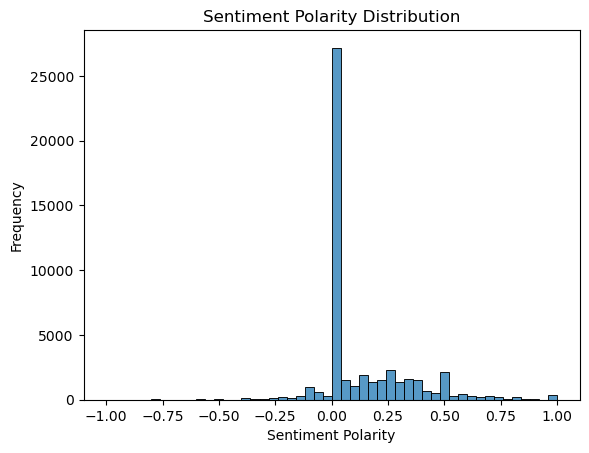

In [58]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply function to calculate sentiment polarity
job_tweets_raw_df['Sentiment'] = job_tweets_raw_df['Text'].apply(calculate_sentiment)

# Visualizing the sentiment distribution
sns.histplot(job_tweets_raw_df['Sentiment'], bins=50, kde=False)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'Retweets' column is binary after some threshold
X = job_tweets_raw_df[['Followers', 'Following']]  # features
y = job_tweets_raw_df['Retweets'].apply(lambda x: 1 if x > 0 else 0)  # target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[7736    9]
 [2205   50]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      7745
           1       0.85      0.02      0.04      2255

    accuracy                           0.78     10000
   macro avg       0.81      0.51      0.46     10000
weighted avg       0.79      0.78      0.69     10000



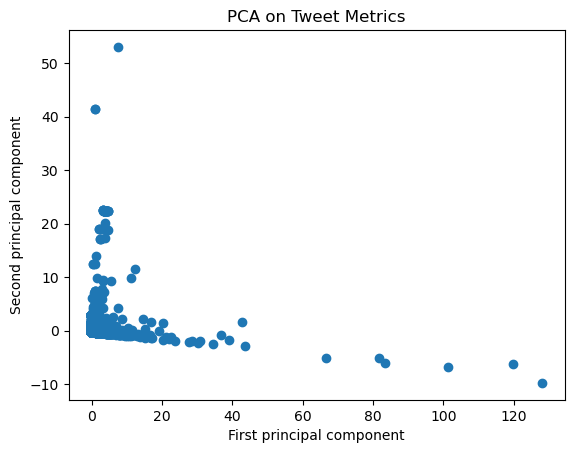

[0.43535532 0.27272185]


In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(job_tweets_raw_df[['Likes', 'Retweets', 'Followers', 'Following']])

# Apply PCA
pca = PCA(n_components=2)  # reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

# Plot the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('PCA on Tweet Metrics')
plt.show()

# Explained variance can help understand the importance of each principal component
print(pca.explained_variance_ratio_)


<h1> COMPARATIONS </h1>

Economic Similarity: Ireland, Germany, France, and Spain are all part of the European Union and share similar economic structures, which makes them suitable for comparison.

Geographical Proximity: These countries are geographically close and part of the Eurozone, which means they are subject to similar economic policies and labour market regulations.

Labour Market Dynamics: Comparing Ireland with these countries can provide insights into different labour market dynamics within Europe, as they have different sizes of economies and populations.

Data Availability and Reliability: Data from these countries is often available and reliable due to their development status and the presence of strong statistical agencies.

IRELAND vs GERMANY, SPAIN, FRANCE

In [72]:
# Filter the dataset for the selected countries
ireland_df = job_tweets_raw_df.dropna()[job_tweets_raw_df.dropna()['Location'].str.contains("Ireland")]
germany_df = job_tweets_raw_df.dropna()[job_tweets_raw_df.dropna()['Location'].str.contains("Germany")]
france_df = job_tweets_raw_df.dropna()[job_tweets_raw_df.dropna()['Location'].str.contains("France")]
spain_df = job_tweets_raw_df.dropna()[job_tweets_raw_df.dropna()['Location'].str.contains("Spain")]

# Now you can conduct various statistical tests to compare these subsets.

# For example, to compare the average number of likes between the countries, you can perform an ANOVA test:
from scipy import stats

f_val, p_val = stats.f_oneway(
    ireland_df['Likes'].dropna(),
    germany_df['Likes'].dropna(),
    france_df['Likes'].dropna(),
    spain_df['Likes'].dropna()
)

print(f"ANOVA test for average likes: F-value = {f_val}, P-value = {p_val}")

# If ANOVA test indicates significant differences, conduct post-hoc testing to find out between which countries they exist
# You can use Tukey's HSD test for this:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Concatenate all countries data and perform Tukey's HSD test
all_likes = pd.concat([ireland_df['Likes'], germany_df['Likes'], france_df['Likes'], spain_df['Likes']], ignore_index=True)
countries = ['Ireland'] * len(ireland_df['Likes']) + ['Germany'] * len(germany_df['Likes']) + ['France'] * len(france_df['Likes']) + ['Spain'] * len(spain_df['Likes'])

tukey_results = pairwise_tukeyhsd(endog=all_likes, groups=countries, alpha=0.05)
print(tukey_results)

# You can perform similar tests for other variables of interest, such as Retweets or Followers.


ANOVA test for average likes: F-value = 2.9181025770922453, P-value = 0.0336169249801684
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
 France Germany  -1.6884 0.2098  -3.923 0.5462  False
 France Ireland  -1.9601 0.0609 -3.9799 0.0596  False
 France   Spain  -0.3751 0.9852 -3.1337 2.3836  False
Germany Ireland  -0.2718 0.9629 -1.7219 1.1784  False
Germany   Spain   1.3133 0.4838 -1.0602 3.6868  False
Ireland   Spain   1.5851 0.2378 -0.5874 3.7575  False
-----------------------------------------------------


In [73]:
ireland_df = ireland_df.set_index("Timestamp")
germany_df = germany_df.set_index("Timestamp")
france_df = france_df.set_index("Timestamp")
spain_df = spain_df.set_index("Timestamp")

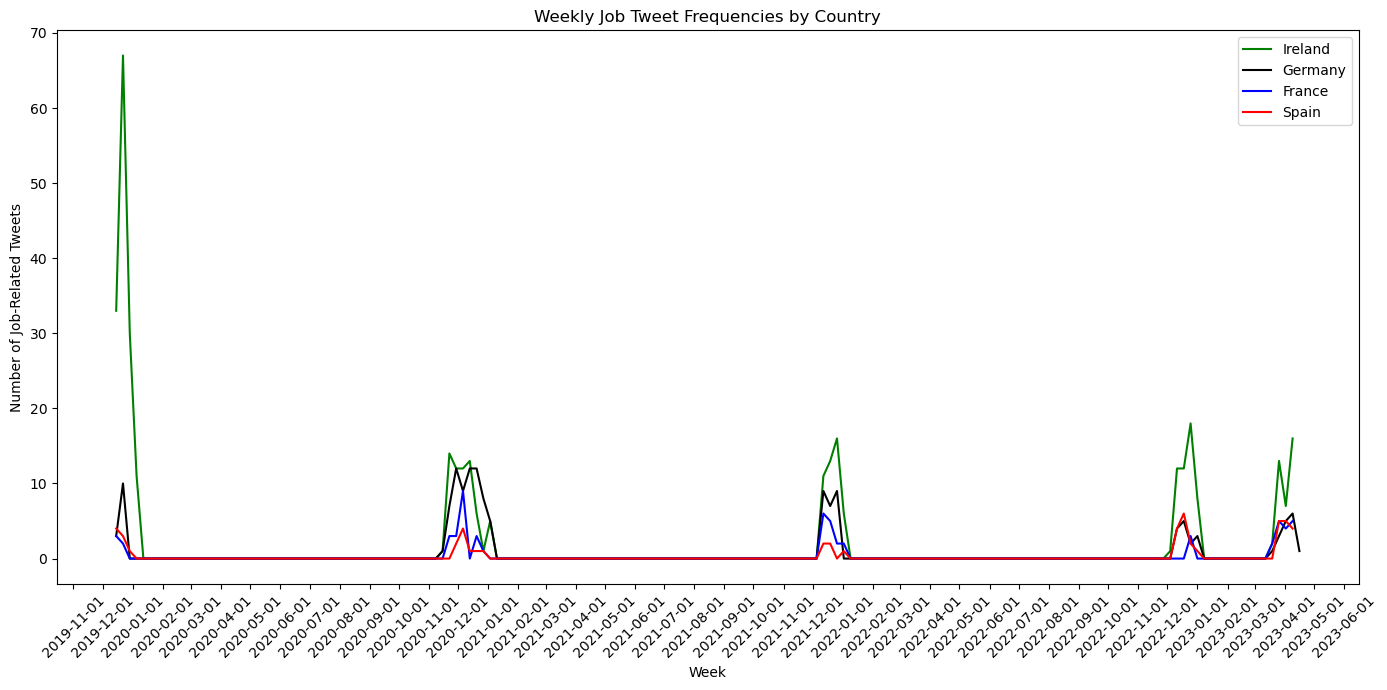

In [74]:
import matplotlib.dates as mdates

# Assuming 'Timestamp' is already converted to datetime and set as index
# Resample and count tweets by week for each country
ireland_weekly_tweets = ireland_df.resample('W').size()
germany_weekly_tweets = germany_df.resample('W').size()
france_weekly_tweets = france_df.resample('W').size()
spain_weekly_tweets = spain_df.resample('W').size()

# Plotting the tweet frequencies over time
plt.figure(figsize=(14, 7))
plt.plot(ireland_weekly_tweets.index, ireland_weekly_tweets, label='Ireland', color='green')
plt.plot(germany_weekly_tweets.index, germany_weekly_tweets, label='Germany', color='black')
plt.plot(france_weekly_tweets.index, france_weekly_tweets, label='France', color='blue')
plt.plot(spain_weekly_tweets.index, spain_weekly_tweets, label='Spain', color='red')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.legend()
plt.title('Weekly Job Tweet Frequencies by Country')
plt.xlabel('Week')
plt.ylabel('Number of Job-Related Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [75]:
# Perform Kruskal-Wallis H-test for non-parametric comparison of median likes
stats.kruskal(
    ireland_df['Likes'].dropna(),
    germany_df['Likes'].dropna(),
    france_df['Likes'].dropna(),
    spain_df['Likes'].dropna()
)

# Perform the same for retweets
stats.kruskal(
    ireland_df['Retweets'].dropna(),
    germany_df['Retweets'].dropna(),
    france_df['Retweets'].dropna(),
    spain_df['Retweets'].dropna()
)


KruskalResult(statistic=37.086611631582294, pvalue=4.4112625000946866e-08)

In [76]:
# Assuming 'Sentiment' has been calculated as in the previous examples
# Perform ANOVA for sentiment scores
f_val, p_val = stats.f_oneway(
    ireland_df['Sentiment'].dropna(),
    germany_df['Sentiment'].dropna(),
    france_df['Sentiment'].dropna(),
    spain_df['Sentiment'].dropna()
)

print(f"ANOVA test for sentiment: F-value = {f_val}, P-value = {p_val}")

# If ANOVA shows significant differences, use Tukey's HSD for post-hoc analysis
all_sentiments = pd.concat([ireland_df['Sentiment'], germany_df['Sentiment'], france_df['Sentiment'], spain_df['Sentiment']], ignore_index=True)
tukey_results = pairwise_tukeyhsd(endog=all_sentiments, groups=countries, alpha=0.05)
print(tukey_results)


ANOVA test for sentiment: F-value = 0.6359400439990862, P-value = 0.592075711766554
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
 France Germany  -0.0019 0.9999 -0.0871 0.0833  False
 France Ireland   0.0229 0.8699 -0.0541 0.0999  False
 France   Spain  -0.0025 0.9999 -0.1077 0.1027  False
Germany Ireland   0.0248 0.6557 -0.0305 0.0801  False
Germany   Spain  -0.0006    1.0 -0.0911 0.0899  False
Ireland   Spain  -0.0254 0.8595 -0.1082 0.0575  False
-----------------------------------------------------
